In [2]:
import numpy as np
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
data = boston.data
target = boston.target

print(data.shape)
print(target.shape)
print(boston.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
num_features = len(boston.feature_names)
num_samples = data.shape[0]

In [16]:
import pandas as pd
bos_dataframe = pd.DataFrame(boston.data)

In [18]:
bos_dataframe.columns = boston.feature_names

In [19]:
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
bos_dataframe['PRICE'] = target
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
bos_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
weights_init = np.random.uniform(low=-1, high=1, size=num_features)
bias_init = 0

In [26]:
weights_init

array([ 0.22413437,  0.27036716, -0.27750709, -0.4948901 ,  0.3280309 ,
       -0.35451258, -0.0707563 ,  0.69740808,  0.61002744,  0.39175992,
       -0.7652315 , -0.71457014,  0.10199612])

In [29]:
for i in range(num_features):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

In [30]:
def hypothesis(weights, bias):
    return data.dot(weights) + np.repeat(bias, num_samples)

In [31]:
hypothesis(weights_init, bias_init)

array([-0.12964502, -0.28501504, -0.30966781, -0.206598  , -0.21613212,
       -0.18578168,  0.03687652,  0.04782505,  0.12209356,  0.11162798,
        0.07518735,  0.0637677 ,  0.07307504, -0.27900744, -0.2793458 ,
       -0.27976541, -0.25281099, -0.28471878, -0.08973519, -0.30881792,
       -0.26925617, -0.31563252, -0.32035777, -0.29939269, -0.29203215,
       -0.10533898, -0.24140365, -0.12866092, -0.30997112, -0.31232387,
       -0.2137111 , -0.29064739,  0.01535453, -0.24834509, -0.06183739,
       -0.27825886, -0.22917022, -0.22541424, -0.21696059,  0.00474688,
       -0.01458235, -0.18192007, -0.15395747, -0.17112521, -0.17439151,
       -0.20168941, -0.19490845, -0.18773768, -0.13397322, -0.14541951,
        0.02332525, -0.00310324, -0.00584295,  0.02311041,  0.15609958,
        0.26740606,  0.3081707 ,  0.39646647,  0.12099735,  0.06130494,
        0.0861407 ,  0.06859092,  0.03557796,  0.09378915,  0.01710996,
        0.23497214,  0.26085365, -0.04530619, -0.03237788, -0.05

In [32]:
def cost(weights, bias):
    return np.mean(np.square(hypothesis(weights, bias) - target))/2

In [33]:
cost(weights_init, bias_init)

297.37576989244639

In [40]:
def gradient(weights, bias):
    
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias) - target) * data[:, weight_num])
        weight_gradients.append(grad)
        
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - target)
    
    return (weight_gradients, bias_gradient)

In [41]:
gradient(weights_init, bias_init)

(array([ 0.36150797, -0.75867744,  1.1189162 , -0.4469002 ,  0.53696702,
        -0.51565949,  0.98227368, -0.3996833 ,  1.36892493,  1.07929547,
         0.46477251, -0.76272944,  1.29781548]), -22.532806324110673)

In [46]:
LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    weights = weights
    bias = bias
    
    for i in range(num_epochs):
        weight_gradient, bias_gradient = gradient(weights, bias)
        
        weights = weights - LEARNING_RATE*weight_gradient
        bias = bias - LEARNING_RATE*bias_gradient
        costs.append(cost(weights, bias))
        
    return costs, weights, bias

In [53]:
costs, trained_weights, trained_bias = \
    gradient_descent(weights_init, bias_init, 10000)

In [54]:
cost(trained_weights, trained_bias)

12.320220081322997

In [55]:
import matplotlib.pyplot as plt

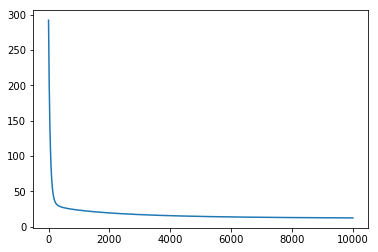

In [56]:
plt.plot(costs)
plt.show()

In [57]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [58]:
regr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print(regr.coef_)
print(regr.intercept_)

[ -9.53562887   4.63952195   0.57866304   2.6885614  -15.50010579
  33.4057266    0.07510617 -17.89578905   7.33572092  -8.76616522
 -20.9761982    3.7278883  -19.95196805]
22.5328063241


In [61]:
print(trained_weights)
print(trained_bias)

[ -4.27647607   4.51378818  -3.75060331   3.8262563   -2.65116187
  17.62801056   0.83450339 -11.19004639   3.49049754  -5.01623128
 -12.65808754   3.58348253 -24.22802808]
22.5328063241


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
    train_test_split(data, target, test_size=0.25, random_state=5)

In [67]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
print(mean_squared_error(Y_train, regr.predict(X_train)))
print(mean_squared_error(Y_test, regr.predict(X_test)))

21.5147127322
24.2981057684


In [71]:
plt.scatter(Y_test, regr.predict(X_test))
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")

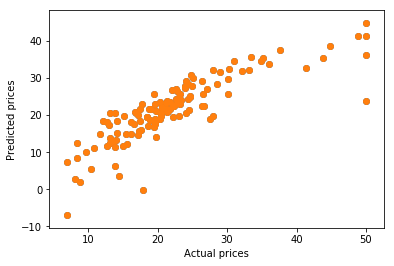

In [72]:
plt.show()

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [74]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
mean_squared_error(Y_test, tree.predict(X_test))

32.990078740157486

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [77]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
mean_squared_error(Y_test, rfr.predict(X_test))

10.382134645669291

In [79]:
plt.scatter(Y_test, rfr.predict(X_test))
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")

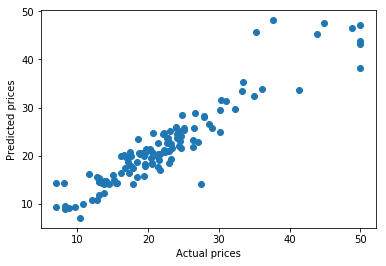

In [80]:
plt.show()